# 라이브러리 로드

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import seaborn as sns
plt.style.use('ggplot')

# 데이터 로드
토큰화 된 데이터를 로드합니다.

In [20]:

train_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/new_train.parquet"
test_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/new_test.parquet"
#train_path = os.getcwd()+"/new_train.parquet"
#test_path = os.getcwd()+"/new_test.parquet"
train = pd.read_parquet(train_path)
test = pd.read_parquet(test_path)

columns  = ['okt', 'komoran','hannanum','mecab']
for column in columns:
  train[column] = train[column].apply(lambda x : list(x))
  test[column] = test[column].apply(lambda x : list(x))

In [21]:
train.head()

,score,reviews,okt,komoran,hannanum,mecab
0,2,사이즈를 3센티씩 늘린 건데도 작아요 그리고 색상은 정말 달라요 칙칙한 핑크네요 ...,"[사이즈, 3, 센티, 씩, 늘린, 건데, 도, 작아요, 색상, 은, 정말, 달라,...","[사이즈, 3, 센티, 씩, 늘리, ㄴ, 걸, ㄴ데, 도, 작, 아요, 색상, 은,...","[사이즈, 3센티, 씩, 늘리, ㄴ, ㄴ데, 도, 작, 요, 색상, 은, 정말, 다...","[사이즈, 3, 센티, 씩, 늘린, 건데, 도, 작, 아요, 색상, 은, 정말, 달..."
1,2,불만족 빗이 아픔 멍이 피부에 빗질 못해주겠네요,"[불만족, 빗, 아픔, 멍, 피부, 빗질, 못, 해주겠네요]","[불, 만족, 빗, 아픔, 멍, 피부, 빗, 질, 겠, 네요]","[불만족, 빗, 아프, ㅁ, 멍, 피부, 빗질, 겠네요]","[불, 만족, 빗이, 아픔, 멍, 피부, 빗, 질, 못해, 겠, 네요]"
2,1,이 제품 쓰고 삼 일 만에 변기 물이 잘 안 내려갔어요 혹시나 해서 다시 빼보니 ...,"[제품, 쓰고, 만에, 변기, 물이, 내려갔어요, 해서, 빼, 보니, 물이, 내려가...","[제품, 쓰, 고, 만, 변기, 물, 내려가, 았, 어요, 혹시나, 아서, 빼, 니...","[제품, 쓰, 고, 만, 변기, 물, 내리, 아아, 요, 어서, 빼, 니, 물, 내...","[제품, 쓰, 고, 만, 변기, 물, 내려갔, 어요, 혹시나, 해서, 빼, 니, 물..."
3,5,적당하고 만족합니다,"[적당하고, 만족합니다]","[적당, 고, 만족, ㅂ니다]","[적당, 하고, 만족, ㅂ니다]","[적당, 고, 만족, 합니다]"
4,2,편하자고 이용하는 밀키 튼데 손은 근 많이 가서 저는 패스요,"[편하자고, 이용, 하는, 밀키, 튼데, 손, 은, 근, 많이, 가서, 는, 패스, 요]","[편하, 자고, 이용, 는, 밀, 기, 트, ㄴ데, 손은, ㄴ, 많이, 아서, 는,...","[편하, 고, 이용, 는, 밀키, 트, ㄴ데, 손, 은, 근, 서, 는, 패스요]","[편하, 자고, 이용, 는, 밀키, 튼, 손, 은, 근, 많이, 서, 는, 패스, 요]"


In [22]:
test.head()

,score,reviews,okt,komoran,hannanum,mecab
0,1,너무 낮고 솜도 적고 실망스럽습니다,"[너무, 낮고, 솜, 도, 적고, 실망, 스럽습니다]","[너무, 낮, 고, 솜, 도, 고, 실망, 스럽]","[너무, 낮, 고, 솜, 도, 고, 실망, 스럽]","[너무, 낮, 고, 솜, 도, 고, 실망, 스럽]"
1,1,피부에 뾰루지가 많이 올라와요,"[피부, 뾰루지, 많이, 올라와요]","[피부, 뾰루지, 많이, 올라오, 아요]","[피부, 뾰루지, 오르]","[피부, 뾰루지, 많이, 올라, 와요]"
2,5,배송도 빠르네요 가격 대비 좋은 것 같아요 첨에는 힘들어 하나 조금 지나니 잘하네요,"[배송, 도, 빠르네요, 가격, 대비, 좋은, 같아요, 첨, 에는, 힘들어, 지나니...","[배, 송도, 빠르, 네요, 가격, 대비, 은, 아요, 첨, 는, 힘들, 지나, 니...","[배송, 도, 빠르, 요, 가격, 대비, 은, 요, 첨, 에는, 힘들, 지나, 니,...","[배송, 도, 빠르, 네요, 가격, 대비, 은, 아요, 첨, 는, 힘들, 지나, 니..."
3,5,재구매입니다 핏도 좋고 착용감도 좋습니다,"[재구매, 입니다, 핏, 도, 좋고, 착용, 감도, 좋습니다]","[재, 구매, ㅂ니다, 핏도, 고, 착용감, 도]","[재구매, ㅂ니다, 핏, 도, 고, 착용감, 도]","[재, 구매, 입니다, 핏, 도, 고, 착용감, 도]"
4,1,파손 제품 온 거 출장 같다 오늘 받았는데 현재 상황 장난하시는지 택배회사 항의하세요,"[파손, 제품, 온, 거, 출장, 오늘, 받았는데, 현재, 상황, 장난, 하시는지,...","[파손, 제품, ㄴ, 거, 출장, 다, 오늘, 았, 는데, 현재, 상황, 장난, 시...","[파손, 제품, ㄴ, 출장, 다, 오늘, 아ㄴ데, 현재, 상황, 장난, 시는지, 택...","[파손, 제품, 온, 거, 출장, 다, 오늘, 았, 는데, 현재, 상황, 장난, 시..."


각 형태소 분석기별로 데이터가 토큰화 되어있는 것을 확인할 수 있습니다.

In [23]:
train['okt'][:5]

0    [사이즈, 3, 센티, 씩, 늘린, 건데, 도, 작아요, 색상, 은, 정말, 달라,...
1                    [불만족, 빗, 아픔, 멍, 피부, 빗질, 못, 해주겠네요]
2    [제품, 쓰고, 만에, 변기, 물이, 내려갔어요, 해서, 빼, 보니, 물이, 내려가...
3                                        [적당하고, 만족합니다]
4    [편하자고, 이용, 하는, 밀키, 튼데, 손, 은, 근, 많이, 가서, 는, 패스, 요]
Name: okt, dtype: object

# 레이블 데이터 생성

학습/테스트 데이터를 생성하기 전에 레이블 데이터를 생성하겠습니다.

In [24]:
train['score'].unique()

array([2, 1, 5, 4])

레이블은 1,2,4,5로 평점을 나타내고 있습니다.  
1,2는 부정, 4,5는 긍정적으로 판단하여 긍/부정으로 나누도록 하겠습니다.

In [25]:
def create_label(data):
  data['label'] = 1
  data.loc[data['score'] <= 2, 'label'] = 0
  return data

In [26]:
train = create_label(train)
test = create_label(test)

생성된 레이블 데이터의 분포를 확인해보겠습니다.

In [27]:
train['label'].value_counts(normalize=True)

1    0.500702
0    0.499298
Name: label, dtype: float64

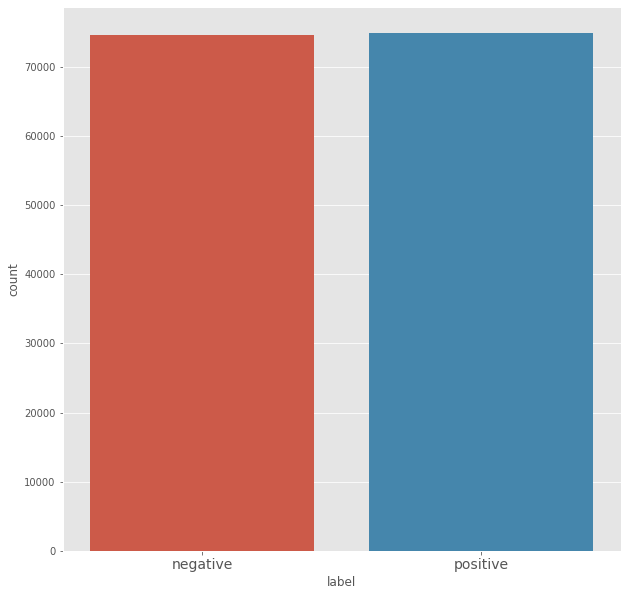

In [28]:
plt.figure(figsize=(10,10))
sns.countplot(data=train, x='label')
plt.xticks([0,1], ["negative",'positive'], fontsize=14)
plt.show()

비율이 거의 비슷한 것을 확인할 수 있습니다.

# 빈도 수가 낮은 단어 제거

In [29]:
from tensorflow.keras.preprocessing.text import Tokenizer
#빈도수가 낮은 단어를 제거하고 훈련/테스트 데이터반환
def get_low_freq_data(train,test, column):
  tokenizer = Tokenizer()
  tokenizer.fit_on_texts(train[column])
  threshold = 3
  words_cnt = len(tokenizer.word_index)
  rare_cnt = 0
  words_freq = 0
  rare_freq = 0

  for key, value in tokenizer.word_counts.items():
    words_freq +=  value
    #만약 단어의 등장 빈도가 임계값 보다 작다면
    if value < threshold:
      #희귀한 것이라 판단
      rare_cnt += 1
      rare_freq += value
  print(column)
  print('전체 단어 수 : ',words_cnt)
  print("빈도가 {} 이하인 희귀한 단어의 수 : {}".format(threshold-1, rare_cnt))
  print("희귀한 단어의 비율 : {}".format((rare_cnt / words_cnt)* 100))
  print("희귀한 단어가 등장할 비율 : {}".format((rare_freq / words_freq)* 100))
  #패딩, oov를 넣어주기 위하여 2를 더함
  vocab_size = words_cnt - rare_cnt + 2
  print('Vacab size : {}'.format(vocab_size))
  tokenizer = Tokenizer(vocab_size, oov_token='OOV')
  tokenizer.fit_on_texts(train[column])
  X_train = tokenizer.texts_to_sequences(train[column])
  X_test = tokenizer.texts_to_sequences(test[column])
  y_train = np.array(train['label'])
  y_test = np.array(test['label'])

  #전처리 과정을 거치면서 문장의 길이가 0인 데이터를 제거합니다.
  drop_index = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
  X_train = np.delete(X_train, drop_index, axis=0)
  y_train = np.delete(y_train, drop_index, axis=0)
  print("train data set : ", len(X_train), len(y_train))
  print("test data set : ", len(X_test), len(y_test))
  print("-"*100)
  print()
  return X_train, X_test, y_train, y_test, vocab_size, column, tokenizer

# 각 형태소 분석기별 학습/테스트 데이터 생성

In [30]:
okt_X_train, okt_X_test, okt_y_train, okt_y_test, okt_size, okt_name, okt_tokenizer = get_low_freq_data(train, test, 'okt')
komoran_X_train, komoran_X_test, komoran_y_train, komoran_y_test, komoran_size, komoran_name, komoran_tokenizer = get_low_freq_data(train, test, 'komoran')
hannanum_X_train, hannanum_X_test, hannanum_y_train, hannanum_y_test, hannanum_size, hannanum_name,hannanum_tokenizer  = get_low_freq_data(train, test, 'hannanum')
mecab_X_train, mecab_X_test, mecab_y_train, mecab_y_test, mecab_size, mecab_name, mecab_tokenizer = get_low_freq_data(train, test, 'mecab')

okt
전체 단어 수 :  82554
빈도가 2 이하인 희귀한 단어의 수 : 54823
희귀한 단어의 비율 : 66.40865372967997
희귀한 단어가 등장할 비율 : 3.7657707440116885
Vacab size : 27733


/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4454: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


train data set :  149553 149553
test data set :  49926 49926
----------------------------------------------------------------------------------------------------

komoran
전체 단어 수 :  44597
빈도가 2 이하인 희귀한 단어의 수 : 32408
희귀한 단어의 비율 : 72.6685651501222
희귀한 단어가 등장할 비율 : 1.8204946129993003
Vacab size : 12191
train data set :  149537 149537
test data set :  49926 49926
----------------------------------------------------------------------------------------------------

hannanum
전체 단어 수 :  80179
빈도가 2 이하인 희귀한 단어의 수 : 65004
희귀한 단어의 비율 : 81.07359782486687
희귀한 단어가 등장할 비율 : 4.188797340782913
Vacab size : 15177
train data set :  149530 149530
test data set :  49926 49926
----------------------------------------------------------------------------------------------------

mecab
전체 단어 수 :  42551
빈도가 2 이하인 희귀한 단어의 수 : 26159
희귀한 단어의 비율 : 61.476816056026884
희귀한 단어가 등장할 비율 : 1.5616354413488451
Vacab size : 16394
train data set :  149530 149530
test data set :  49926 49926
-----------------------------------

# 패딩

각 형태소 분석기를 패딩처리 하기 위하여 리뷰의 길이를 확인합니다.

## okt

In [31]:
print("리뷰 최대 길이 : ", max(len(tokens) for tokens in okt_X_train))
print("리뷰 평균 길이 : ", sum(map(len, okt_X_train)) / len(okt_X_train))

리뷰 최대 길이 :  74
리뷰 평균 길이 :  11.5923385020695


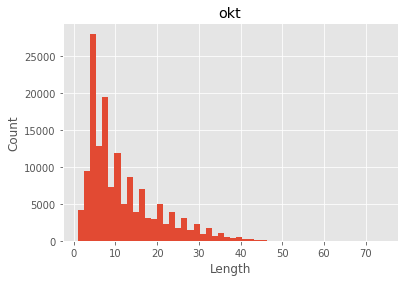

In [32]:
plt.hist([len(s) for s in okt_X_train], bins=50)
plt.xlabel('Length')
plt.ylabel("Count")
plt.title("okt")
plt.show()

In [33]:
okt_len = 45

## komoran

In [34]:
print("리뷰 최대 길이 : ", max(len(tokens) for tokens in komoran_X_train))
print("리뷰 평균 길이 : ", sum(map(len, komoran_X_train)) / len(komoran_X_train))

리뷰 최대 길이 :  62
리뷰 평균 길이 :  13.090338845904357


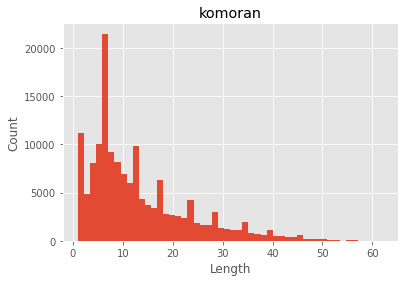

In [35]:
plt.hist([len(s) for s in komoran_X_train], bins=50)
plt.xlabel('Length')
plt.ylabel("Count")
plt.title("komoran")
plt.show()

In [36]:
komoran_len = 55

## hannanum

In [37]:
print("리뷰 최대 길이 : ", max(len(tokens) for tokens in hannanum_X_train))
print("리뷰 평균 길이 : ", sum(map(len, hannanum_X_train)) / len(hannanum_X_train))

리뷰 최대 길이 :  58
리뷰 평균 길이 :  11.347154417173812


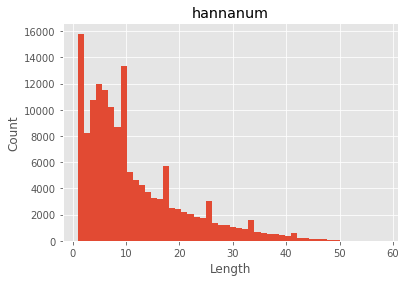

In [38]:
plt.hist([len(s) for s in hannanum_X_train], bins=50)
plt.xlabel('Length')
plt.ylabel("Count")
plt.title("hannanum")
plt.show()

In [39]:
hannanum_len = 50

## mecab

In [40]:
print("리뷰 최대 길이 : ", max(len(tokens) for tokens in mecab_X_train))
print("리뷰 평균 길이 : ", sum(map(len, mecab_X_train)) / len(mecab_X_train))

리뷰 최대 길이 :  79
리뷰 평균 길이 :  13.2708754096168


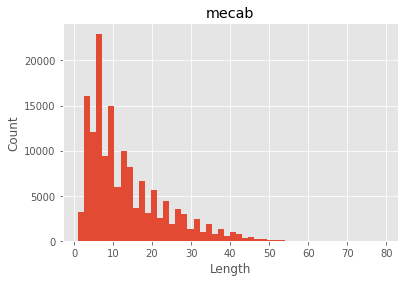

In [41]:
plt.hist([len(s) for s in mecab_X_train], bins=50)
plt.xlabel('Length')
plt.ylabel("Count")
plt.title("mecab")
plt.show()

In [42]:
mecab_len = 55

pad_sequences 함수를 사용하여 패딩을 진행합니다.

In [43]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
def padding(X_train, X_test, max_len):
  X_train = pad_sequences(X_train, maxlen=max_len)
  X_test = pad_sequences(X_test, maxlen=max_len)
  return X_train, X_test

In [44]:
okt_X_train, okt_X_test = padding(okt_X_train, okt_X_test, okt_len)
komoran_X_train, komoran_X_test = padding(komoran_X_train, komoran_X_test, komoran_len)
hannanum_X_train, hannanum_X_test = padding(hannanum_X_train, hannanum_X_test, hannanum_len)
mecab_X_train, mecab_X_test = padding(mecab_X_train, mecab_X_test, mecab_len)

# 모델링

간단한 모델을 만들어서 각 형태소 분석기별로 성능을 비교하겠습니다.

In [45]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout, LayerNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.optimizers import Adam

In [46]:
def modeling(X_train, y_train, vocab_size, name):
  print(f"{name} start")
  model = Sequential()
  model.add(Embedding(vocab_size, 100))
  model.add(LSTM(4, dropout=0.2,
                 kernel_regularizer=l2(0.01),
                 recurrent_regularizer = l2(0.01),
                 activity_regularizer = l2(0.01)
                ))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=3)
  history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])
  print("-"*100)
  return history, model

## 각 형태소 분석기별 비교

In [47]:
okt_history, okt_model = modeling(okt_X_train, okt_y_train, okt_size, okt_name)
komoran_history, komoran_model = modeling(komoran_X_train, komoran_y_train, komoran_size, komoran_name)
hannanum_history, hannanum_model = modeling(hannanum_X_train, hannanum_y_train, hannanum_size, hannanum_name)
mecab_history, mecab_model = modeling(mecab_X_train, mecab_y_train, mecab_size, mecab_name)

okt start
Epoch 1/50
1870/1870 [==============================] - 21s 7ms/step - loss: 0.3704 - accuracy: 0.8767 - val_loss: 0.2814 - val_accuracy: 0.9016
Epoch 2/50
1870/1870 [==============================] - 14s 7ms/step - loss: 0.2512 - accuracy: 0.9139 - val_loss: 0.2691 - val_accuracy: 0.9027
Epoch 3/50
1870/1870 [==============================] - 14s 7ms/step - loss: 0.2264 - accuracy: 0.9244 - val_loss: 0.2701 - val_accuracy: 0.9025
Epoch 4/50
1870/1870 [==============================] - 15s 8ms/step - loss: 0.2108 - accuracy: 0.9298 - val_loss: 0.2757 - val_accuracy: 0.9019
Epoch 5/50
1870/1870 [==============================] - 14s 7ms/step - loss: 0.1998 - accuracy: 0.9344 - val_loss: 0.2827 - val_accuracy: 0.8985
----------------------------------------------------------------------------------------------------
komoran start
Epoch 1/50
1870/1870 [==============================] - 15s 7ms/step - loss: 0.4324 - accuracy: 0.8303 - val_loss: 0.3587 - val_accuracy: 0.8504
Epoch

시각화를 진행해보겠습니다.

In [48]:
def ploting(history, name):
    hist_dict = history.history
    loss = hist_dict['loss']
    val_loss = hist_dict['val_loss']
    acc = hist_dict['accuracy']
    val_acc = hist_dict['val_accuracy']

    f, ax = plt.subplots(1, 2, figsize=(14,6))
    ax[0].plot(loss, 'b--', label='train loss')
    ax[0].plot(val_loss, 'r:', label='val loss')
    ax[0].legend()
    ax[0].grid()
    ax[0].set_title(f"{name} loss", fontsize=16)
    ax[1].plot(acc, 'b--', label='train acc')
    ax[1].plot(val_acc, 'r:', label='val acc')
    ax[1].legend()
    ax[1].grid()
    ax[1].set_title(f"{name} acc", fontsize=16)
    plt.show()

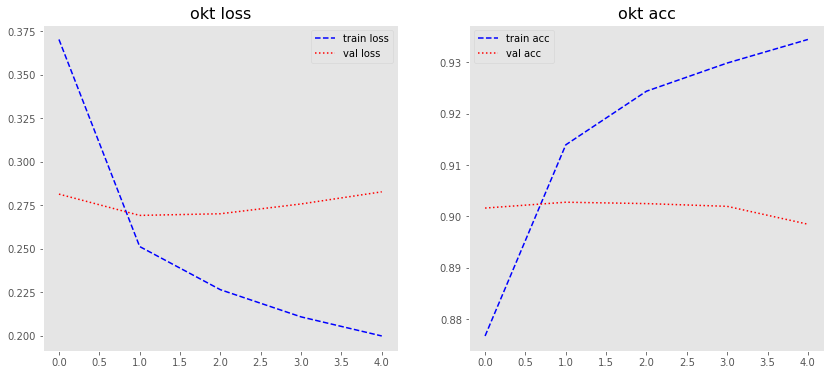

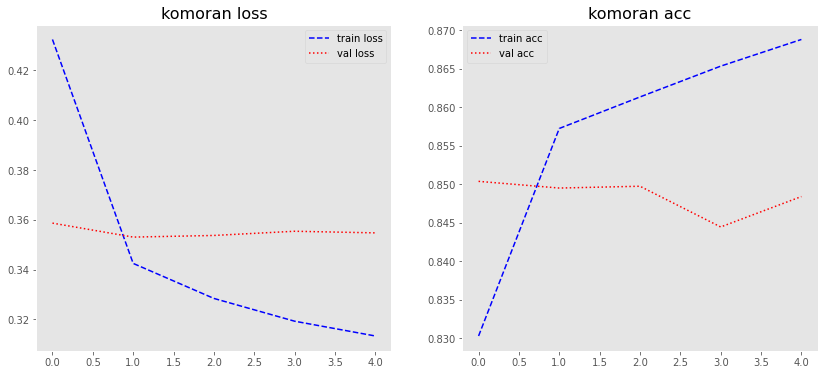

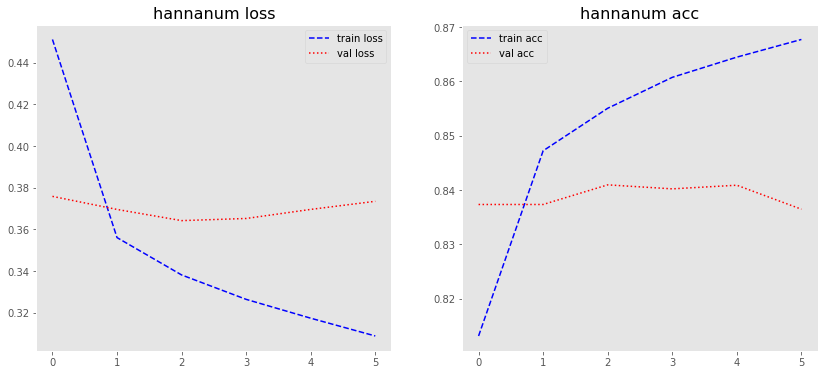

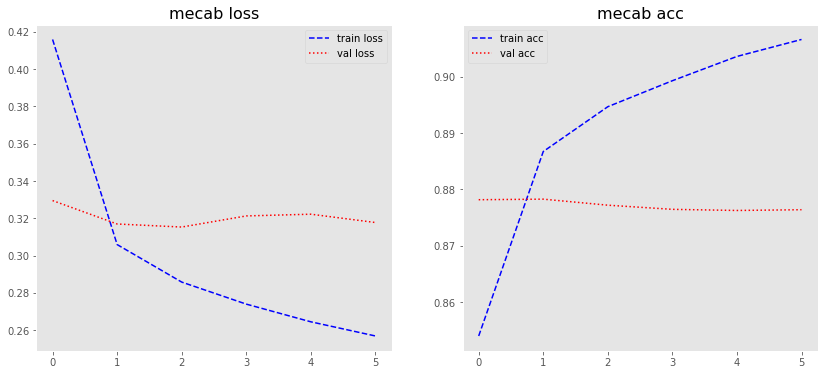

In [49]:
ploting(okt_history, okt_name)
ploting(komoran_history, komoran_name)
ploting(hannanum_history, hannanum_name)
ploting(mecab_history, mecab_name)

모델의 성능을 평가해보겠습니다.

In [50]:
def model_eva(model, X_test,y_test, name):
    print(name)
    result = model.evaluate(X_test, y_test)
    print("accuracy : ", result[1] * 100)
    print("-"*100)

In [51]:
model_eva(okt_model, okt_X_test, okt_y_test, okt_name)
model_eva(komoran_model, komoran_X_test, komoran_y_test, komoran_name)
model_eva(hannanum_model, hannanum_X_test, hannanum_y_test, hannanum_name)
model_eva(mecab_model, mecab_X_test, mecab_y_test, mecab_name)

okt
1561/1561 [==============================] - 5s 3ms/step - loss: 0.2910 - accuracy: 0.8943
accuracy :  89.4343614578247
----------------------------------------------------------------------------------------------------
komoran
1561/1561 [==============================] - 5s 3ms/step - loss: 0.3585 - accuracy: 0.8479
accuracy :  84.79149341583252
----------------------------------------------------------------------------------------------------
hannanum
1561/1561 [==============================] - 5s 3ms/step - loss: 0.3771 - accuracy: 0.8344
accuracy :  83.4354817867279
----------------------------------------------------------------------------------------------------
mecab
1561/1561 [==============================] - 5s 3ms/step - loss: 0.3230 - accuracy: 0.8739
accuracy :  87.38933801651001
----------------------------------------------------------------------------------------------------


형태소 분석기의 토큰화 속도와 모델 성능을 비교해보았을 때,  
성능은 okt 모델이 좋았지만 속도는 3위에 위치합니다.  
mecab 모델의 경우 성능은 약 87%로 2위에 위치하지만 속도는 가장 빨랐기 때문에  
mecab 형태소 분석기를 최종 분석기로 선택하고 하이퍼 파라미터 튜닝을 진행하여  
모델의 일반화 성능을 올리도록 하겠습니다.

# 하이퍼 파라미터 튜닝

로컬에서 하이퍼파라미터 튜닝 작업을 한 모델을 불러와 사용하였습니다.

```python
import kerastuner as kt

def reg_wrapper(type, value):
    if type == "l2":
        return l2(value)
    if type == "l1":
        return l2(value)

def model_builder(hp):
    hp_units = hp.Int('units', min_value=4, max_value=128, step=8)
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    hp_dropout = hp.Float('drop_out', min_value=0.1, max_value=0.4, step=0.1)
    reg = reg_wrapper(hp.Choice('type', ['l1','l2']), hp.Choice('value', [0.01, 0.001, 0.05, 0.005, 0.1]))
    model = Sequential()
    model.add(Embedding(mecab_size, 100))
    model.add(LSTM(hp_units,
                 kernel_regularizer=reg,
                 recurrent_regularizer = reg,
                 activity_regularizer = reg
                ))
    model.add(Dropout(hp_dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer = Adam(hp_learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model
  ```

```python
tuner = kt.Hyperband(model_builder, objective='val_accuracy', max_epochs=100, factor=3, directory='my_dir', project_name='intro_to_kt')
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
tuner.search(mecab_X_train, mecab_y_train, epochs=50, validation_data=(mecab_X_test, mecab_y_test), callbacks=[early_stopping])
```

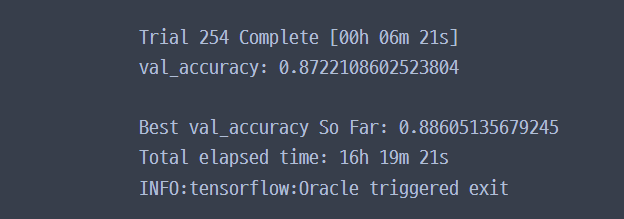

```python
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models()[0]
best_model.save('best_model')
```

로컬에서 작업한 모델을 코랩에서 사용하기 위하여 저장하였습니다.

In [52]:
model_path = "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/"
best_model = tf.keras.models.load_model(model_path+'best_model')

In [40]:
model_eva(best_model, mecab_X_test, mecab_y_test, mecab_name)

mecab
1561/1561 [==============================] - 6s 4ms/step - loss: 0.2976 - accuracy: 0.8861
accuracy :  88.605135679245
----------------------------------------------------------------------------------------------------


# 감성 분석

## 필요 라이브러리 로드

In [44]:
!pip install git+https://github.com/ssut/py-hanspell.git
!pip install git+https://github.com/haven-jeon/PyKoSpacing.git
!pip install konlpy
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab/
!bash install_mecab-ko_on_colab190912.sh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-odaf3pb2
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-odaf3pb2
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=9785f854a0969bd2969e5c0cf95feb159cade65a73ef76d4c246c1d764feb010
  Stored in directory: /tmp/pip-ephem-wheel-cache-z638_qsz/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/haven-jeon/PyKoSpacing.git to /tmp/pip-req-build-3eehibir
  Running command git clone -q https://github.com/haven-jeon/PyKoSpacing.git /tmp/pip-req-build-3eehibir
     |████████████████████████████████| 671.4 MB 1.8 kB/s 
     |████████████████████████████████| 463 kB 57.4 MB/s 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 453 kB 72.2 MB/s 
Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 115 (delta 11), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (115/115), 1.27 MiB | 40.65 MiB/s, done.
Resolving deltas: 100% (50/50), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-07-26 05:33:40--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.

In [45]:
stop_words_path =  "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/korea_stop_words.txt"
stop_words_path2 = "/content/drive/MyDrive/Colab Notebooks/DataScience/AIB_13/Project/Section4/korea_stop_words2.txt"
stop_words_df1 = pd.read_csv(stop_words_path, sep='\t', names=['form','pos', 'ratio'])
stop_words_df2 = pd.read_csv(stop_words_path2)
stop_words_set1 = set(stop_words_df1['form'].values)
stop_words_set2 = set(stop_words_df2['form'].values)
all_stop_words_set = stop_words_set1.union(stop_words_set2)
stop_words = list(all_stop_words_set)
print(len(stop_words))

664


In [158]:
from hanspell import spell_checker
from pykospacing import Spacing
from konlpy.tag import Mecab
import re

def sentiment_analysis(sentence, stopwords=stop_words, tokenizer = mecab_tokenizer, max_len = mecab_len, model=best_model):
  mecab = Mecab()
  original = sentence
  try:
    sentence = sentence.replace(' ', '')
    result = spell_checker.check(sentence)
    sentence = result.checked
  except : 
    spacing = Spacing()
    sentence = spacing(sentence)
  sentence = re.sub('[^0-9ㄱ-ㅎㅏ-ㅣ가-힣]',' ', sentence)
  token = [word for word in mecab.morphs(sentence) if not word in stopwords]
  sequence =tokenizer.texts_to_sequences([token])
  pad = pad_sequences(sequence, maxlen=mecab_len)
  
  score = float(model.predict(pad))

  print(original)
  if score > 0.5:
    positive = str(round(score * 100, 2))
    print(f"긍정({positive}%)적인 문구입니다.")
  else:
    negative = str(round((1-score) * 100, 2))
    print(f"부정({negative}%)적인 문구입니다.")
  print("-"* 100)

In [165]:
sentence1 = "가격대비 최고의 성능입니다. 왠만한 크기 방은 다 커버될 것 같아요. 제습력 아주 우수합니다."
sentence2 = "쓰지도못할 쓰레기를 갖다팔고잇네ㅋㅋㅋ 절대절대로 구매하지마시고 그냥 뒤로가기 눌러주세요.."
sentence3 = "수압도 세고 스패너없이 설치가 가능해서 좋아요"
sentence4 = "어떻게. 하는지도모늘겠고 수조꼭지 빼서 붙이라고 했는데. 우리같은 주부가 할있나요?갠히 주문했네요"
sentence5 = "이거 쓰니깐 깔끔하고 좋은데 배송이 느리고 배달기사가 싸가지가없습니다."
sentiment_analysis(sentence1)
sentiment_analysis(sentence2)
sentiment_analysis(sentence3)
sentiment_analysis(sentence4)
sentiment_analysis(sentence5)

가격대비 최고의 성능입니다. 왠만한 크기 방은 다 커버될 것 같아요. 제습력 아주 우수합니다.
긍정(99.24%)적인 문구입니다.
----------------------------------------------------------------------------------------------------
쓰지도못할 쓰레기를 갖다팔고잇네ㅋㅋㅋ 절대절대로 구매하지마시고 그냥 뒤로가기 눌러주세요..
부정(98.96%)적인 문구입니다.
----------------------------------------------------------------------------------------------------
수압도 세고 스패너없이 설치가 가능해서 좋아요
긍정(91.57%)적인 문구입니다.
----------------------------------------------------------------------------------------------------
어떻게. 하는지도모늘겠고 수조꼭지 빼서 붙이라고 했는데. 우리같은 주부가 할있나요?갠히 주문했네요
부정(90.62%)적인 문구입니다.
----------------------------------------------------------------------------------------------------
이거 쓰니깐 깔끔하고 좋은데 배송이 느리고 배달기사가 싸가지가없습니다.
부정(70.79%)적인 문구입니다.
----------------------------------------------------------------------------------------------------
